DLBFTPPP01 - Projekt: Programmierung mit Python
Aufgabe 1.1 Detailliertes Reporting einer Aktie
Thanagorn Jaroenkal


In [47]:
# Importieren der notwendigen Bibliotheken
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt



In [48]:
plt.style.use('seaborn-v0_8') # Setzen des Plot-Stils
data = yf.download("ORCL", start="2020-01-01", end="2025-01-01", auto_adjust=0, actions=0)# Herunterladen der Aktienkursdaten von Oracle (ORCL) von Yahoo Finance
data.head() # Anzeigen der ersten fünf Zeilen des DataFrames

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ORCL,ORCL,ORCL,ORCL,ORCL,ORCL
Date,,,,,,
2020-01-02,49.451614,53.950001,53.959999,53.230000,53.270000,13899600
2020-01-03,49.277462,53.759998,54.049999,52.950001,52.990002,11026700
2020-01-06,49.534111,54.040001,54.200001,53.349998,53.360001,10982400
2020-01-07,49.644108,54.160000,54.330002,53.610001,53.889999,12015400
2020-01-08,49.837460,54.130001,54.599998,53.700001,53.939999,11856700


In [49]:
data = data[['Close']].dropna() # Auswahl der Spalte Close und Entfernen von NaN-Werten
data.rename(columns={'Close': 'Kurs'}, inplace=True) # Umbenennen der Spalte Close in Kurs

# Kurzüberblick über die Daten
print("Anzahl Beobachtungen:", len(data)) # Ausgabe der Anzahl der Beobachtungen
display(data.head()) # Anzeigen der ersten fünf Zeilen des DataFrames
display(data.tail()) # Anzeigen der letzten fünf Zeilen des DataFrames


Anzahl Beobachtungen: 1258


Price,Kurs
Ticker,ORCL
Date,
2020-01-02,53.950001
2020-01-03,53.759998
2020-01-06,54.040001
2020-01-07,54.160000
2020-01-08,54.130001


Price,Kurs
Ticker,ORCL
Date,
2024-12-24,171.410004
2024-12-26,171.679993
2024-12-27,168.960007
2024-12-30,166.910004
2024-12-31,166.639999


In [50]:
stats = data['Kurs'].describe() # Berechnung der deskriptiven Statistik für die Kursdaten
print("Deskriptive Statistik zum Schlusskurs (Close):") # Ausgabe der deskriptiven Statistik
display(stats) # Anzeigen der deskriptiven Statistik

Deskriptive Statistik zum Schlusskurs (Close):


Ticker,ORCL
count,1258.000000
mean,91.429555
std,32.392387
min,39.799999
25%,66.557499
50%,85.405003
75%,112.202499
max,192.429993


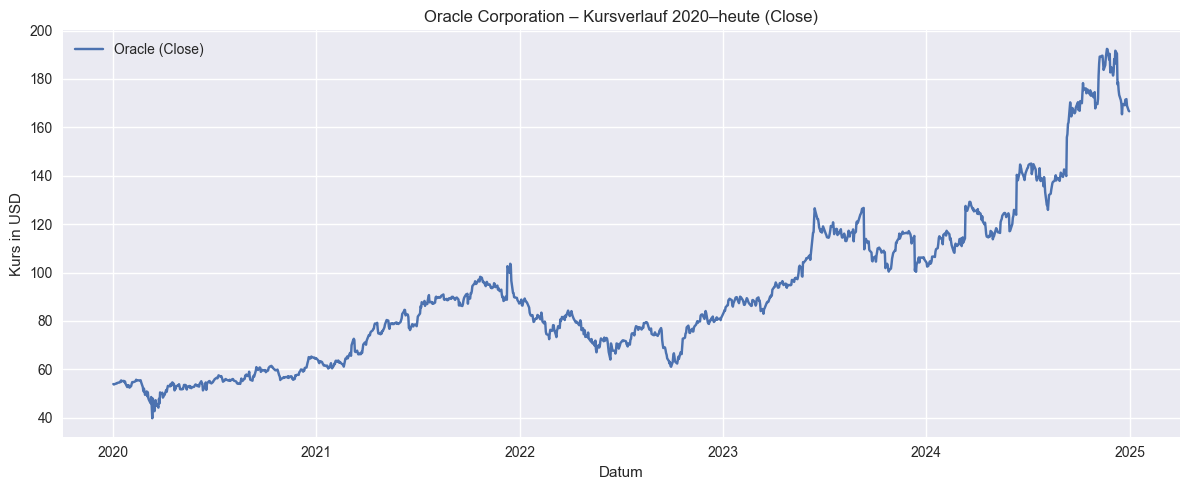

In [51]:
plt.figure(figsize=(12, 5)) # Erstellen einer Figur mit benutzerdefinierter Größe
plt.plot(data.index, data['Kurs'], label='Oracle (Close)') # Plotten der Kursdaten
plt.title('Oracle Corporation – Kursverlauf 2020–heute (Close)') # Setzen des Titels des Plots
plt.xlabel('Datum') # Setzen der x-Achsenbeschriftung
plt.ylabel('Kurs in USD') # Setzen der y-Achsenbeschriftung
plt.legend() # Anzeigen der Legende
plt.tight_layout() # Optimieren des Layouts
plt.show() # Anzeigen des Plots

Quelle: Eigene Darstellung auf Basis von Yahoo Finance (2025).

In [52]:
# Prozentuale tägliche Rendite basierend auf dem Close-Kurs
data['Rendite'] = data['Kurs'].pct_change()

# Erste Zeilen anzeigen (erste Rendite ist NaN, weil kein Vortag existiert)
display(data[['Kurs', 'Rendite']].head())

Price,Kurs,Rendite
Ticker,ORCL,
Date,,
2020-01-02,53.950001,NaN
2020-01-03,53.759998,-0.003522
2020-01-06,54.040001,0.005208
2020-01-07,54.160000,0.002221
2020-01-08,54.130001,-0.000554


Kennzahlen zu Rendite & Risiko

In [53]:
# NaN-Werte bei Renditen entfernen (erste Zeile)
returns = data['Rendite'].dropna()

durchschnittliche_rendite = returns.mean()
volatilitaet = returns.std()

print(f"Durchschnittliche tägliche Rendite: {durchschnittliche_rendite * 100:.3f} %") # In Prozent umrechnen
print(f"Tägliche Volatilität (Standardabweichung): {volatilitaet * 100:.3f} %") # In Prozent umrechnen

# Auf Jahresbasis hochrechnen (ca. 252 Handelstage)
jahres_rendite = (1 + durchschnittliche_rendite) ** 252 - 1
jahres_volatilitaet = volatilitaet * np.sqrt(252)

print(f"Geschätzte jährliche Rendite: {jahres_rendite * 100:.2f} %") # Hochrechnung auf Jahresbasis
print(f"Geschätzte jährliche Volatilität: {jahres_volatilitaet * 100:.2f} %")

Durchschnittliche tägliche Rendite: 0.111 %
Tägliche Volatilität (Standardabweichung): 2.066 %
Geschätzte jährliche Rendite: 32.20 %
Geschätzte jährliche Volatilität: 32.80 %


Histogramm der täglichen Renditen

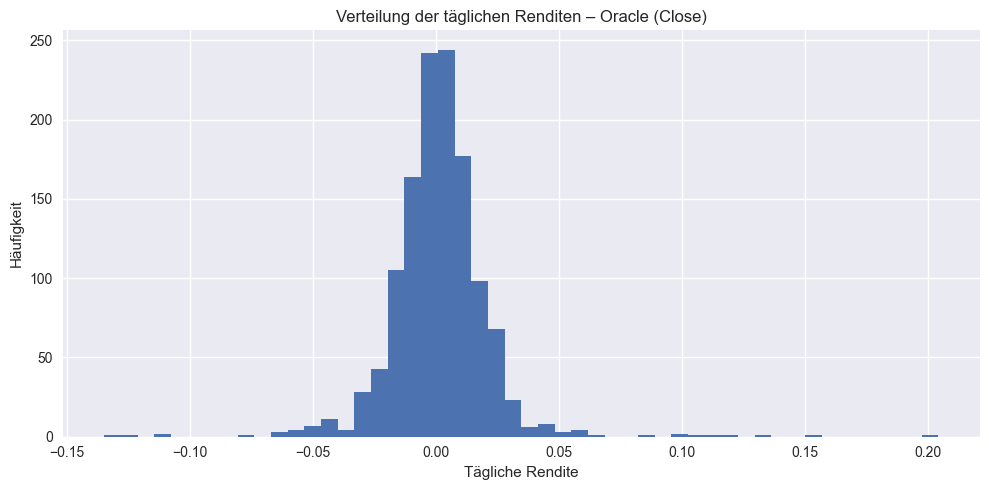

In [54]:
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50)
plt.title('Verteilung der täglichen Renditen – Oracle (Close)')
plt.xlabel('Tägliche Rendite')
plt.ylabel('Häufigkeit')
plt.tight_layout()
plt.show()

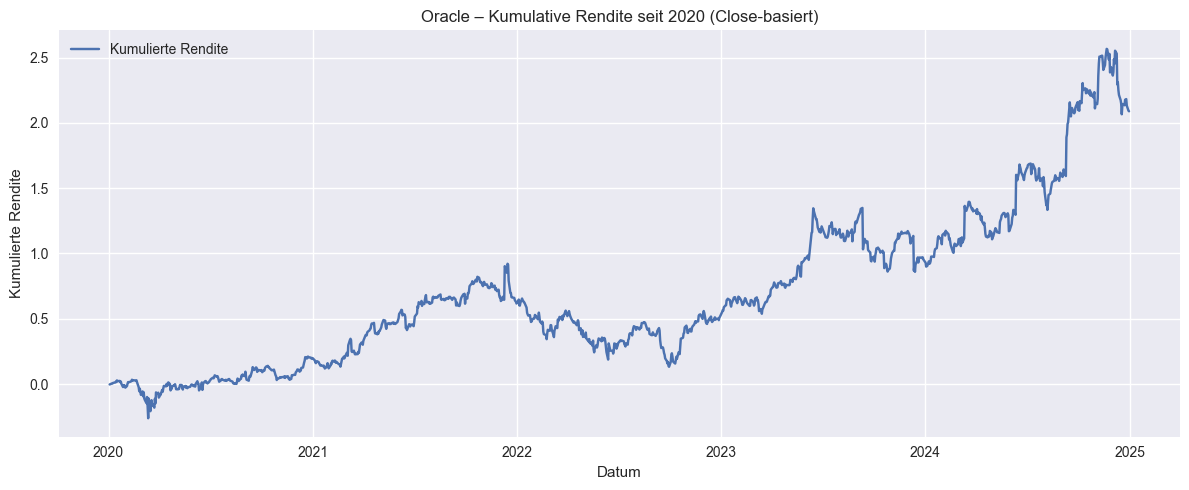

In [56]:
# Kumulative Rendite auf Basis der täglichen Renditen
data['Kumulierte_Rendite'] = (1 + returns).cumprod() - 1

plt.figure(figsize=(12, 5)) # Erstellen einer Figur mit benutzerdefinierter Größe
plt.plot(data.index, data['Kumulierte_Rendite'], label='Kumulierte Rendite') # Plotten der kumulativen Rendite
plt.title('Oracle – Kumulative Rendite seit 2020 (Close-basiert)') # Setzen des Titels des Plots
plt.xlabel('Datum') # Setzen der x-Achsenbeschriftung
plt.ylabel('Kumulierte Rendite') # Setzen der y-Achsenbeschriftung
plt.legend() # Anzeigen der Legende
plt.tight_layout() # Optimieren des Layouts
plt.show() # Anzeigen des Plots